In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

import warnings

import sklearn
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier#KNN
from sklearn.preprocessing import label_binarize
from sklearn import metrics

In [2]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
## 拦截异常
warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

In [132]:
path = "data/iris.data"
names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'cla']
df = pd.read_csv(path,names = names)

size_mapping = {
           'Iris-setosa': 1,
           'Iris-versicolor': 2,
           'Iris-virginica': 3}
df['cla'] = df['cla'].map(size_mapping)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
cla             150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [133]:
X = df.iloc[:,0:4]
Y = df['cla']

X = X.dropna()
Y = Y.dropna()
#数据分割
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.4,random_state = 0)
#数据标准化
X.describe()
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
#模型对象建立
#
kNN = KNeighborsClassifier(n_neighbors = 3)
#KNeighborsClassifier方法中含有8个参数（以下前两个常用）：
#n_neighbors : int, optional (default = 5)：K的取值，默认的邻居数量是5；
#weights：确定近邻的权重，“uniform”权重一样，“distance”指权重为距离的倒数，默认情况下是权重相等。也可以自己定义函数确定权重的方式；
#algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'},optional：计算最近邻的方法，可根据需要自己选择；
#leaf_size : int, optional (default = 30)
kNN.fit(X_train,Y_train)
Y_predict = kNN.predict(X_test)
print(kNN.score(X_test,Y_test))

0.9333333333333333


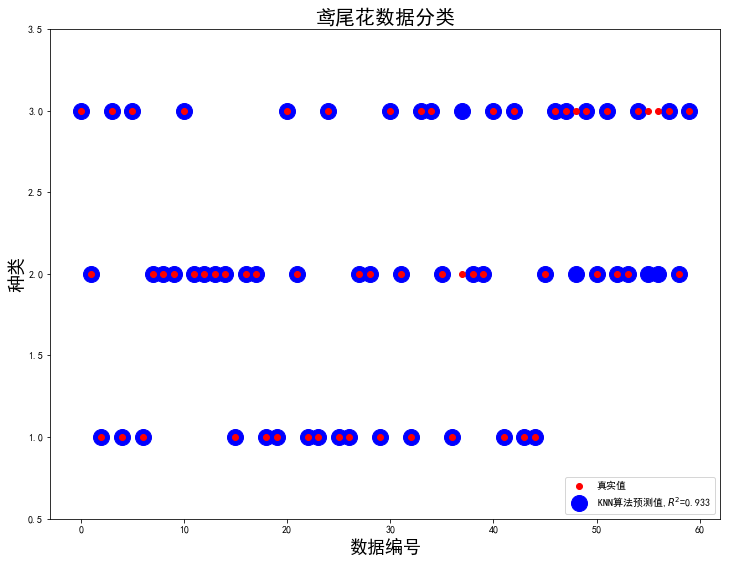

In [134]:
x_test_len = np.arange(len(X_test))
plt.figure(figsize=(12, 9), facecolor='w')
plt.ylim(0.5,3.5)
plt.plot(x_test_len, Y_test, 'ro',markersize = 6, zorder=3, label=u'真实值')
plt.plot(x_test_len, Y_predict, 'bo', markersize = 16, zorder=1, label=u'KNN算法预测值,$R^2$=%.3f' % kNN.score(X_test, Y_test))
plt.legend(loc = 'lower right')
plt.xlabel(u'数据编号', fontsize=18)
plt.ylabel(u'种类', fontsize=18)
plt.title(u'鸢尾花数据分类', fontsize=20)
plt.show()